<a href="https://colab.research.google.com/github/Krithika-Devi/DS-BI-Tasks/blob/main/_Task_1_DS_%26_BI_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

---



## ***DATA SCIENCE & BUSINESS ANALYTICS*** 

---

### **TASK 1 - Prediction using Supervised ML**

### **AUTHOR:** KRITHIKA DEVI CHANDRAN


## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
From the given data, the model is with a single regressor x ("Hours") that has a relationship with a response y ("Scores") that is a straight line. This is a simple linear regression task as it involves just two variables.

### **Objective**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 



## **Predicition**
***To Predict the score if a student studies for 9.25 hrs/day.***


In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to plot the diagrams within the cells
%matplotlib inline

In [2]:
# Reading csv data
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")
data.head(5)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the data points on 2-D graph to visualize a relationship between the Hours and Scores from data.

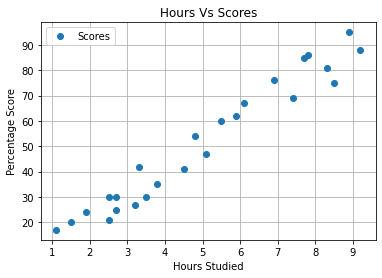

In [6]:
# Plotting the distribution of scores in a scatter plot
data.plot(x="Hours",y="Scores", style="o")
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid(True)
plt.show()

  *From the above graph, we can clearly see that relationship between two variables increases together. Thus there exists a positive correlation between the number of hours studied and percentage of score secured by a student.*

### **Visualizing the correlation matrix as a heatmap**

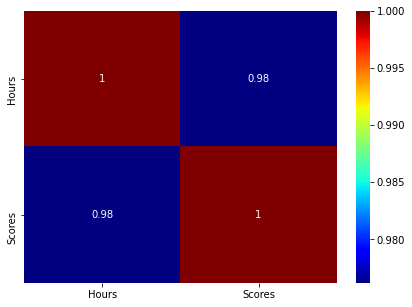

In [7]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot = True, cmap = 'jet')
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## **Data Preparation**

### **1. Separating the data into input and output variables**

Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is dependent on the input variables. So, output variable/s are known as dependent variables as its values are dependent on input variable/s and input variables are are independent variables as its values are not dependent on any other quantity.

For the given data, we see that percentage of marks scored by a student is dependent on the number of hours studied. Thus, "Hours" is a dependent(input) variable and "Scores" is a independent(output) variable.

***By convention input variables are represented with 'X' and output variables are represented with 'y'.***


In [9]:
X = data.iloc[:, :-1].values.reshape(-1,1)
y = data.iloc[:, 1].values

### **2. K-Fold Cross Validation to split Train-Test data**

We want to check the performance of the model that we built. For this purpose, we always the given data (both input and output data) into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

> ***K-Folds cross-validator divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using  folds, and the fold left out is used for test.***

**Each fold is constituted by two arrays:** the first one is related to the **training set**, and the second one to the **test set**.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# implementing Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
  print("Train:", train_index, "Validation:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

Train: [ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 18 19 20 21 22 24] Validation: [ 0  8 11 16 23]
Train: [ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 21 23 24] Validation: [ 1  5  9 13 22]
Train: [ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24] Validation: [ 2  3  4 12 15]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 22 23] Validation: [17 18 20 21 24]
Train: [ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24] Validation: [ 6  7 10 14 19]


## **Model Building**
The prediction values of data are quantitative. For Simple linear model, we have,

*   y = b_0 + b_1 * X

Here there are two regression coefficients b_0 and b_1 which are actually called hyperparameters. In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. And we must always try to find some optimal parameters while building a machine learning model.





### **Training the Algorithm**

***To train our algorithm for the above splitted training sets, we have a class called 'LinearRegression' in the 'sklearn.linear_model' module.***

In [11]:
from sklearn.linear_model import LinearRegression

# creating the model object
lr = LinearRegression()

# fit the model on train data
lr.fit(X_train, y_train)

print("Training complete.")

Training complete.


## **Fitting the data**

In [12]:
# Plotting the regression line
line = lr.intercept_+lr.coef_*X

# interpreting coefficients
# printing y-intercept
print(lr.intercept_)

# printing the coefficient of x
print(lr.coef_)

1.1587663324217772
[10.00873595]


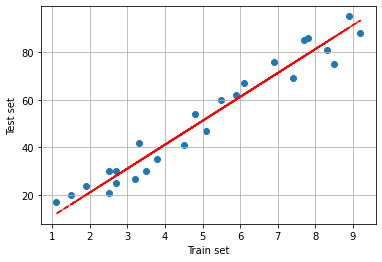

In [13]:
# Fitting the data between train and test sets
plt.scatter(X, y)
plt.plot(X, line, 'r--')
plt.xlabel("Train set")
plt.ylabel("Test set")
plt.grid(True)
plt.show()

## **Prediction on Test set**

Predicting a test data set with the help of training algorithm.



In [14]:
# Test data (Hours)
print(X_test)

# Predicting on the test data(Predicting Scores)
y_pred = lr.predict(X_test)

[[9.2]
 [5.5]
 [7.7]
 [1.1]
 [7.4]]


In [15]:
# Comparing Actual Vs Predicted
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df 

,Actual Score,Predicted Score
0,88,93.239137
1,60,56.206814
2,85,78.226033
3,17,12.168376
4,69,75.223412


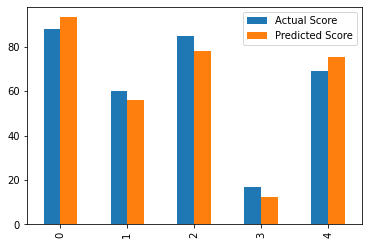

In [16]:
# Visualizing Actual Vs Predicted
vdf = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
vdf.plot(kind='bar')
plt.xticks()
plt.show()

In [17]:
# Model accuracy
acc = lr.score(X_test, y_test)
print(acc*100,"%")

95.41450664986235 %


In [18]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.73957383773927


## **Model Evaluation**
There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

**Mean Squared Error:** It is simply the average of the squared difference between the target value and the value predicted by the regression model.

**Root Mean Squared Error:** It is the square root of the averaged squared difference between the target value and the value predicted by the model.

**Mean Absolute Error:** It is the absolute difference between the target value and the value predicted by the model.

In [19]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.372265268915219
29.959779352459417
5.473552717610329
